# TOPOND

Code examples for [TOPOND (topological analysis)](https://www.crystal.unito.it/topond.html) is given.

## The 'read_topond()' method

The `read_topond()` method is defined in the `crystal_io.Properties_output` class, which read the formatted output of TOPOND analysis. Currently it reads 2D contour plot data 'SURF*.DAT' and trajectory data 'TRAJ*.DAT' and geometry information from standard output.

To apply the correct unit and plotting styles, it is strongly recommended to specify the property name with `type` option. It can also infer the type from file names.

Depending on the property, the `read_topond()` function returns to either a `topond.Surf` or a `topond.Traj` object. It is also saved under the `topond_<type>` attribute of `Properties_output` object.

In [1]:
from CRYSTALpytools.crystal_io import Properties_output

outp = Properties_output('topo_urea.out').read_topond('topo_urea.SURFRHOO')
print('Type: {}'.format(outp.type))
print('Dimension: {} * {}'.format(outp.data.shape[0], outp.data.shape[1]))

Type: SURFRHOO
Dimension: 161 * 161


TOPOND 'SURF*' and 'TRAJ*' files do not contain the full geometry information of system. The standard output is strongly recommended to be added for 'SURF*' files and required for 'TRAJ*' files. The warning message is given due to the missing geometry information for the 'SURFRHOO' object.

In [2]:
from CRYSTALpytools.crystal_io import Properties_output

obj1 = Properties_output().read_topond('topo_urea.SURFRHOO')
obj2 = Properties_output('topo_urea.out').read_topond('topo_urea.TRAJMOLG')

print('Type: {}'.format(obj2.type))
print('N critical points: {:d}'.format(len(obj2.cpoint)))
print('N trajectories: {:d}'.format(len(obj2.trajectory)))

/tmp/ipykernel_11485/1397384057.py:3: UserWarning: Properties output file not found: Geometry not available
  obj1 = Properties_output().read_topond('topo_urea.SURFRHOO')


Type: TRAJMOLG
N critical points: 46
N trajectories: 1346


## The 'topond' module

So far the topond module is mainly developed for 2D plotting proposes.

### The 'Surf' class

The `Surf` class is a 2D, non-spinpolarized verison inherited from the `electronics.ChargeDensity` class. For regular plotting, the same set of parameters can be used. 

**NOTE**

Though 2D periodicity is supported, it is not suggested as TOPOND plotting frame is not always commensurate with periodic boundary.

Use `isovalues` to format isovalue strings.

/home/huanyu/apps/anaconda3/envs/crystal_py3.9/lib/python3.9/site-packages/CRYSTALpytools/topond.py:56: UserWarning: Properties output file not found: Geometry not available
  return Properties_output(output).read_topond(file, type)


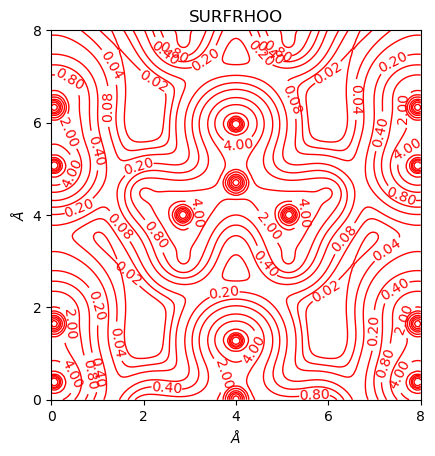

In [3]:
from CRYSTALpytools.topond import Surf

urea = Surf.from_file('topo_urea.SURFRHOO')
fig = urea.plot(isovalues='%.2f')

Similarly with the `substact` method the user can plot difference maps for objects of the same type. By default, positive values are denoted by red, solid lines and negative values by blue, dashed lines. 0 is denoted by the black, solid lines of twice line width.

/home/huanyu/apps/anaconda3/envs/crystal_py3.9/lib/python3.9/site-packages/CRYSTALpytools/topond.py:56: UserWarning: Properties output file not found: Geometry not available
  return Properties_output(output).read_topond(file, type)
/home/huanyu/apps/anaconda3/envs/crystal_py3.9/lib/python3.9/site-packages/CRYSTALpytools/topond.py:246: UserWarning: Properties output file not found: Geometry not available
  objs.append(Properties_output().read_topond(i, type=type))


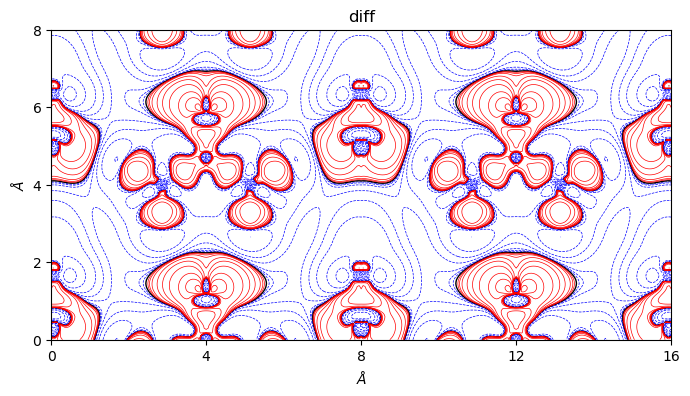

In [4]:
from CRYSTALpytools.topond import Surf

urea = Surf.from_file('topo_urea.SURFRHOO')
urea.substract('topo_ureaPATO.SURFRHOO')
fig = urea.plot(isovalues=None, linewidth=0.5, figsize=[8, 6], a_range=[-1, 1])

Also possible to customize the levels and get color plots. Also as an illlustration why `a_range` and `b_range` are not suggested.

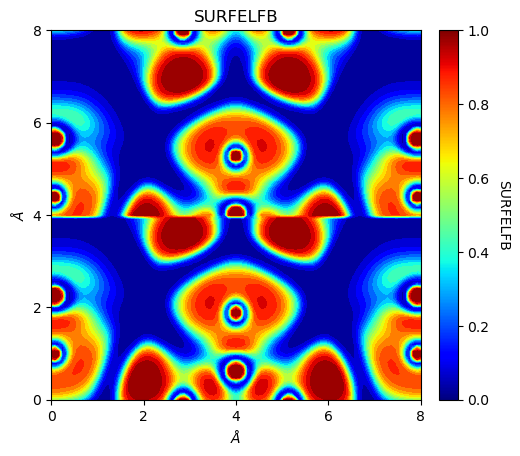

In [5]:
from CRYSTALpytools.topond import Surf
import numpy as np

elf = Surf.from_file('topo_urea.SURFELFB', output='topo_urea.out')
fig = elf.plot(colorplot=True, lineplot=False, b_range=[-0.5, 0.5])

### The 'Traj' class

The `Traj` class generally uses the similar attribute names but is different from 2D contour maps. To instantiate the object, geometry information from standard output is mandatory.



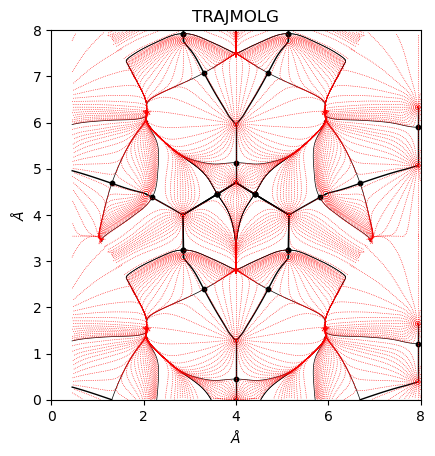

In [6]:
from CRYSTALpytools.topond import Traj

mgraph = Traj.from_file('topo_urea.TRAJMOLG', output='topo_urea.out')
fig = mgraph.plot_2D()

### Overlapped plotting

In both `Surf.plot()` and `Traj.plot_2D()` methods, the user can specify the `overlay` option to get the overlapped 2D surf and molecular graph plots.

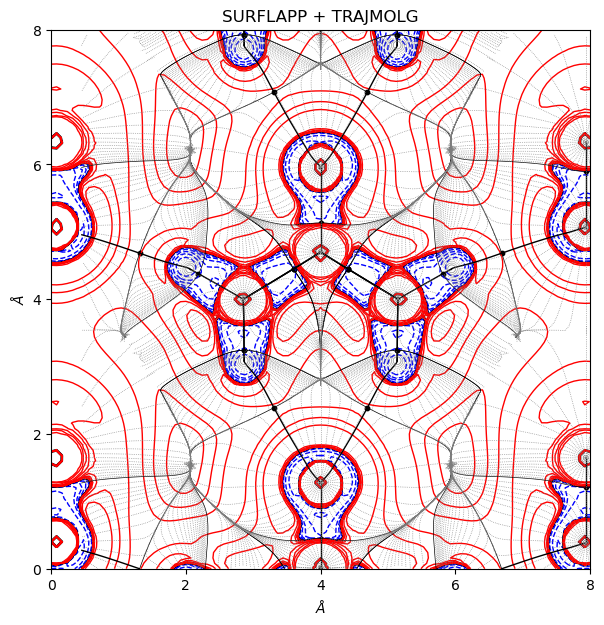

In [7]:
from CRYSTALpytools.topond import Surf, Traj
import numpy as np

lapp = Surf.from_file('topo_urea.SURFLAPP', output='topo_urea.out')
mgraph = Traj.from_file('topo_urea.TRAJMOLG', output='topo_urea.out')
fig = lapp.plot(isovalues=None, overlay=mgraph, figsize=[7, 7],
                traj_color='tab:gray', traj_linestyle=':', traj_linewidth=0.5)

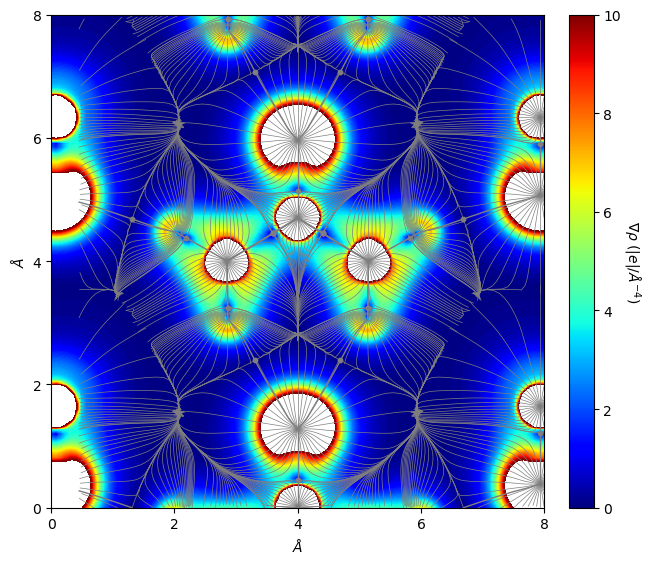

In [8]:
from CRYSTALpytools.topond import Surf, Traj
import numpy as np

levels = np.linspace(0, 10, 100)

grho = Surf.from_file('topo_urea.SURFGRHO', output='topo_urea.out')
mgraph = Traj.from_file('topo_urea.TRAJMOLG', output='topo_urea.out')
fig = mgraph.plot_2D(cpt_color='tab:gray', traj_color='tab:gray',
                     traj_linestyle='-', traj_linewidth=0.5, figsize=[7, 7],
                     add_title=False, overlay=grho, isovalues=None, levels=levels,
                     colorplot=True, lineplot=False)

## The 'plot_topond2D' function

Similar to other modules, the `plot_topond2D()` function manages multiple objects / files and set the uniform scale for them.

Multiple files plot, return to a list of figures.

/home/huanyu/apps/anaconda3/envs/crystal_py3.9/lib/python3.9/site-packages/CRYSTALpytools/plot.py:1282: UserWarning: Properties output file not found: Geometry not available
  obj.append(Properties_output().read_topond(i, type=type))
/home/huanyu/apps/anaconda3/envs/crystal_py3.9/lib/python3.9/site-packages/CRYSTALpytools/plot.py:1282: UserWarning: Properties output file not found: Geometry not available
  obj.append(Properties_output().read_topond(i, type=type))


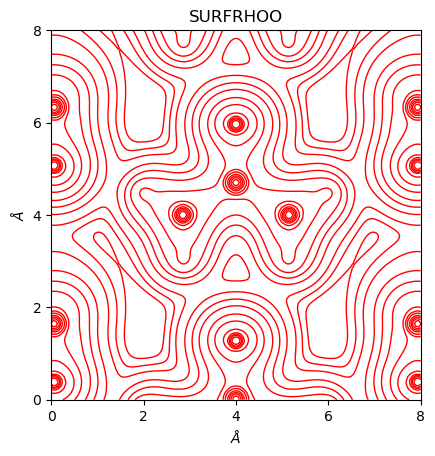

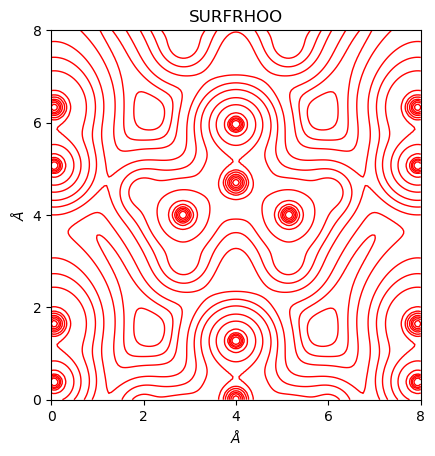

In [9]:
from CRYSTALpytools.plot import plot_topond2D

figs = plot_topond2D('topo_urea.SURFRHOO', 'topo_ureaPATO.SURFRHOO', isovalues=None)

Get the charge difference map with `option='diff'`.

/home/huanyu/apps/anaconda3/envs/crystal_py3.9/lib/python3.9/site-packages/CRYSTALpytools/plot.py:1282: UserWarning: Properties output file not found: Geometry not available
  obj.append(Properties_output().read_topond(i, type=type))
/home/huanyu/apps/anaconda3/envs/crystal_py3.9/lib/python3.9/site-packages/CRYSTALpytools/plot.py:1282: UserWarning: Properties output file not found: Geometry not available
  obj.append(Properties_output().read_topond(i, type=type))


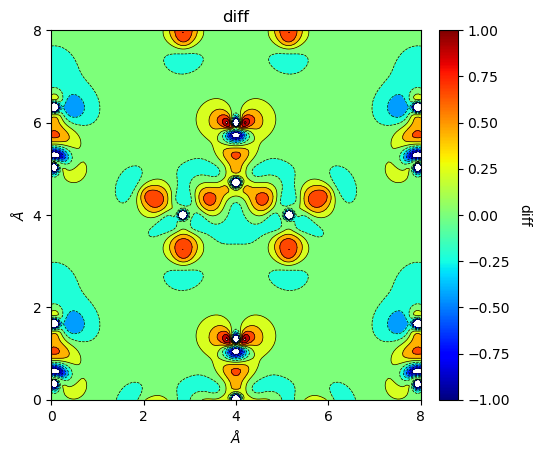

In [10]:
from CRYSTALpytools.plot import plot_topond2D
import numpy as np

levels = np.linspace(-1, 1, 10)
fig = plot_topond2D('topo_urea.SURFRHOO', 'topo_ureaPATO.SURFRHOO', option='diff',
                    levels=levels, lineplot=True, colorplot=True, isovalues=None,
                    linewidth=0.5)

Get overlapped plots with `option='overlay'`. Note in this case inputs must be 1 or more 1\*2 list of `Surf` and `Traj` objects.

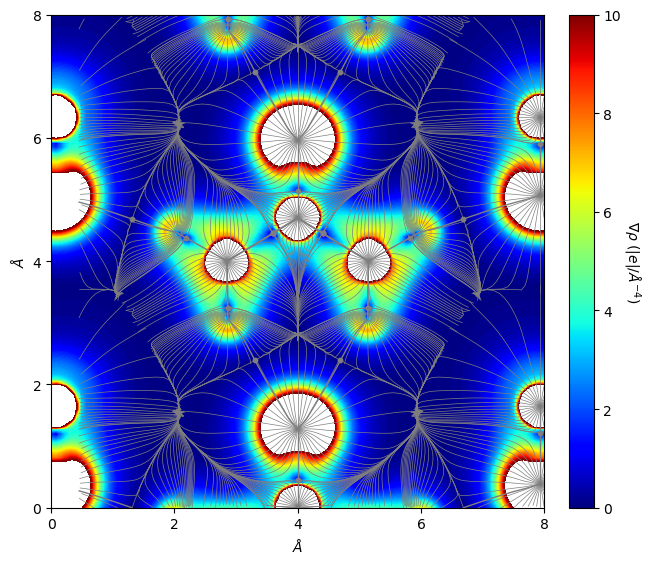

In [11]:
from CRYSTALpytools.topond import Surf, Traj
from CRYSTALpytools.plot import plot_topond2D
import numpy as np

levels = np.linspace(0, 10, 100)
grho = Surf.from_file('topo_urea.SURFGRHO', output='topo_urea.out')
mgraph = Traj.from_file('topo_urea.TRAJMOLG', output='topo_urea.out')

fig = plot_topond2D([grho, mgraph], option='overlay', levels=levels, colorplot=True,
                    lineplot=False, cpt_color='tab:gray', traj_color='tab:gray',
                    traj_linestyle='-', traj_linewidth=0.5, figsize=[7, 7],
                    add_title=False, isovalues=None)

For more details, please refer to the module-specific documentations.